In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('pes2021-all-players.csv')

In [4]:
df.head()

,name,shirt_number,team_name,league,nationality,region,height,weight,age,foot,...,skill_super_sub,com_playing_style_trickster,com_playing_style_mazing_run,com_playing_style_speeding_bullet,com_playing_style_incisive_run,com_playing_style_early_cross,com_playing_style_long_ball_expert,com_playing_style_long_ranger,ball_color,rating_stars
0,L. MESSI,10,FC BARCELONA,Spanish League,ARGENTINA,South America,170,72,33,Left foot,...,0,1,1,1,1,1,0,0,black,5
1,C. RONALDO,7,JUVENTUS,Serie A TIM,PORTUGAL,Europe,187,83,35,Right foot,...,0,1,1,1,1,0,0,1,black,5
2,R. LEWANDOWSKI,9,FC BAYERN MÜNCHEN,Other European Leagues,POLAND,Europe,185,79,32,Right foot,...,0,0,0,0,1,0,0,0,black,5
3,NEYMAR,10,PSG,Ligue 1 Uber Eats,BRAZIL,South America,175,68,28,Right foot,...,0,1,1,1,1,0,0,0,black,5
4,K. DE BRUYNE,17,MANCHESTER B,English League,BELGIUM,Europe,181,68,29,Right foot,...,0,0,1,0,0,1,1,1,black,5


In [5]:
df.shape

(14693, 120)

# Cleaning and Preparing the dataset

##### We dont need any skill columns, ball_color column, rating_star column, so lets drop those columns

In [6]:
#Getting the index of playing style column
playingStyle_column_index = df.columns.get_loc('playing_style')

# Drop all columns after the 'playing_style' column
df = df.iloc[:, :playingStyle_column_index + 1]

In above code we dropped all columns after the playing_style column because we dont need them  

In [7]:
#Some more colums to drop
columns_to_drop = ['shirt_number', 'height', 'condition']
df = df.drop(columns=columns_to_drop)

In [8]:
df.columns

Index(['name', 'team_name', 'league', 'nationality', 'region', 'weight', 'age',
       'foot', 'registered_position', 'LWF', 'SS', 'CF', 'RWF', 'LMF', 'DMF',
       'CMF', 'AMF', 'RMF', 'LB', 'CB', 'RB', 'offensive_awareness',
       'ball_control', 'dribbling', 'tight_possession', 'low_pass',
       'lofted_pass', 'finishing', 'heading', 'place_kicking', 'curl', 'speed',
       'acceleration', 'kicking_power', 'jump', 'physical_contact', 'balance',
       'stamina', 'defensive_awareness', 'ball_winning', 'aggression',
       'gk_awareness', 'gk_catching', 'gk_clearing', 'gk_reflexes', 'gk_reach',
       'weak_foot_usage', 'weak_foot_accuracy', 'form', 'injury_resistance',
       'overall_rating', 'rating_as_GK', 'rating_as_CB', 'rating_as_LB',
       'rating_as_RB', 'rating_as_DMF', 'rating_as_CMF', 'rating_as_LMF',
       'rating_as_RMF', 'rating_as_AMF', 'rating_as_LWF', 'rating_as_RWF',
       'rating_as_SS', 'rating_as_CF', 'playing_style'],
      dtype='object')

In [8]:
df.shape #total 52 columns dropped

(14693, 65)

### Dividing the dataset into four categories : Forwards , midfielders, defenders and goalkeepers, so that we can make our analysis according to the categories.

#### Forwards : all players with registerd position as CF, LWF, RWF, SS
#### Midfielders : all players with registered position as AMF, RMF, LMF, CMF, DMF
#### Defenders : all players with registered position as CB, LB, RB
#### Goalkeepers : all players with registered position as GK

In [9]:
#FORWARDS
forwards_df = df[
    (df.registered_position=='CF') |
    (df.registered_position=='LWF') |
    (df.registered_position=='RWF') |
    (df.registered_position=='SS') 
]

In [10]:
#MIDFIELDERS
midfielders_df = df[
    (df.registered_position=='AMF') |
    (df.registered_position=='RMF') |
    (df.registered_position=='LMF') |
    (df.registered_position=='CMF') |
    (df.registered_position=='DMF') 
]

In [11]:
defenders_df = df[
    (df.registered_position=='CB') |
    (df.registered_position=='LB') |
    (df.registered_position=='RB') 
]

In [12]:
goalkeepers_df=df[
    (df.registered_position=='GK')
]

#### Lets check if our dataset (df) contains any missing values

In [13]:
if df.isnull().any().any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are missing values in the dataset.


##### Yes the dataset df contains  missing values, which are the columns that contains missing values?

In [14]:
df.columns[df.isnull().any()] #columns containing missing values

Index(['LWF', 'SS', 'CF', 'RWF'], dtype='object')

#### Here is the interesting point, positions LWF SS CF and RWF contains the missing values...but when I observed the data the values which were missing were all the goalkeepers and there were no missing values for forwards midfielders and defenders.

In [15]:
if forwards_df.isnull().any().any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [16]:
if midfielders_df.isnull().any().any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [17]:
if defenders_df.isnull().any().any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [18]:
if goalkeepers_df.isnull().any().any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are missing values in the dataset.


#### We can see above there are no missing values for any position other than goalkeepers and it makes sense.....its very rare to find any goalkeepers playing in the middle of field....so we can just fill those postions with value 0.

In [19]:
goalkeepers_df.fillna(0) #filling the missing values with 0.

,name,team_name,league,nationality,region,weight,age,foot,registered_position,LWF,...,rating_as_DMF,rating_as_CMF,rating_as_LMF,rating_as_RMF,rating_as_AMF,rating_as_LWF,rating_as_RWF,rating_as_SS,rating_as_CF,playing_style
5,J. OBLAK,MADRID ROSAS RB,Spanish League,SLOVENIA,Europe,87,27,Right foot,GK,0.0,...,53,48,45,45,43,43,43,44,40,Defensive Goalkeeper
11,ALISSON,LIVERPOOL R,English League,BRAZIL,South America,91,28,Right foot,GK,0.0,...,57,55,52,52,50,49,49,50,42,Offensive Goalkeeper
12,M. NEUER,FC BAYERN MÜNCHEN,Other European Leagues,GERMANY,Europe,92,34,Right foot,GK,0.0,...,57,53,47,47,46,45,45,45,40,Offensive Goalkeeper
17,M. TER STEGEN,FC BARCELONA,Spanish League,GERMANY,Europe,85,28,Right foot,GK,0.0,...,52,49,47,47,45,45,45,46,40,Offensive Goalkeeper
23,DAVID DE GEA,MANCHESTER UNITED,English League,SPAIN,Europe,82,30,Right foot,GK,0.0,...,48,46,44,44,41,42,42,43,40,Offensive Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14669,NAWAF ALAQIDI,AL NASSR,AFC Champions League,SAUDI ARABIA,Asia-Oceania,73,20,Right foot,GK,0.0,...,40,40,40,40,40,40,40,40,40,Offensive Goalkeeper
14670,A. ISAQOV,PAKHTAKOR,AFC Champions League,UZBEKISTAN,Asia-Oceania,74,20,Right foot,GK,0.0,...,40,40,40,40,40,40,40,40,40,Offensive Goalkeeper
14678,C. RAKSRI,POLICE TERO,TOYOTA Thai League,THAILAND,Asia-Oceania,68,25,Right foot,GK,0.0,...,45,43,41,41,40,40,40,40,40,Defensive Goalkeeper
14684,K. SAENSUK,SCG MUANGTHONG UNITED,TOYOTA Thai League,THAILAND,Asia-Oceania,68,26,Right foot,GK,0.0,...,40,40,40,40,40,40,40,40,40,Defensive Goalkeeper


In [20]:
goalkeepers_df.loc[:, 'LWF':'RB']

,LWF,SS,CF,RWF,LMF,DMF,CMF,AMF,RMF,LB,CB,RB
5,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
11,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
12,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
17,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
23,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14669,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
14670,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
14678,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
14684,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


### Now our data is prepared and now we can carry out our analysis.

# Exploratory Analysis and Visualization

##  NATIONS AND CLUBS

In [21]:
no_of_countries = df.nationality.nunique()
no_of_countries

157

In [22]:
top_countries = df.nationality.value_counts().head(20)
top_countries

nationality
BRAZIL               1439
SPAIN                 967
ARGENTINA             924
FRANCE                907
ITALY                 779
ENGLAND               747
COLOMBIA              580
CHINA                 496
CHILE                 491
TURKEY                418
THAILAND              395
NETHERLANDS           388
PORTUGAL              388
RUSSIA                345
BELGIUM               287
DENMARK               257
SCOTLAND              245
SWITZERLAND           230
REPUBLIC OF KOREA     159
GERMANY               148
Name: count, dtype: int64

#### These are the top 20 nations on basis of number of players.
#### 

<Axes: title={'center': 'Top Countries'}, xlabel='nationality', ylabel='count'>

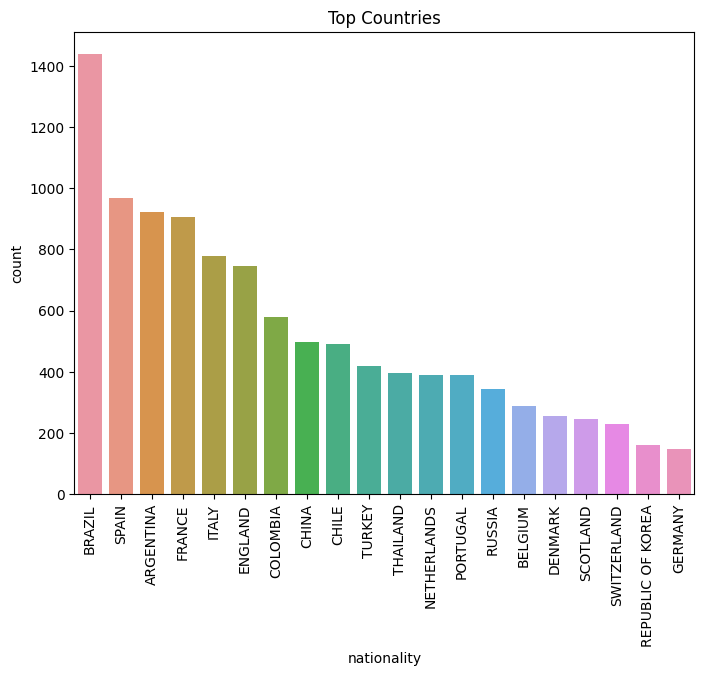

In [23]:
#bar graph of top 20 countries with maximum number of players
top_countries = df.nationality.value_counts().head(20)
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.title("Top Countries")
sns.barplot(x = top_countries.index, y=top_countries, data=df)

### From above analysis we can say that Pes2021 includes players from 157 unique countries, and brazil is the leading nation where most of the players belong from (1439).

In [24]:
#Different clubs available in Pes2021
no_of_clubs=df.team_name.nunique()
no_of_clubs

466

In [25]:
#clubs with maximum number of players
clubs_players = df.team_name.value_counts().head(20)
clubs_players


team_name
Free Agents             1242
GUANGZHOU EVERGRANDE      54
SHANGHAI SIPG             54
SHANGHAI SHENHUA          48
CHIANGRAI UNITED          45
CHELSEA B                 40
SPORTING CP               40
AL SADD                   40
WATFORD BY                40
SHARJAH                   40
GENÇLERBİRLİĞİ            40
CÁDIZ AA                  40
AL DUHAIL                 40
SÃO PAULO                 40
VÉLEZ SARSFIELD           39
BENFICA                   39
DEPORTES LA SERENA        39
ANKARAGÜCÜ                39
SEOUL                     39
TRABZONSPOR               39
Name: count, dtype: int64

In [26]:
premierLeague = df[df['league'] == 'English League']
top_clubs_in_prem = premierLeague.groupby('team_name')['overall_rating'].mean().sort_values(ascending=False)
top_clubs_in_prem

team_name
MANCHESTER B         78.965517
ARSENAL              78.235294
LIVERPOOL R          77.722222
CHELSEA B            77.650000
MANCHESTER UNITED    76.388889
LEICESTER B          75.781250
TOTTENHAM WB         75.657143
NEWCASTLE WB         74.266667
EVERTON B            74.060606
WEST HAM RB          73.965517
SHEFFIELD RB         73.880000
WOLVERHAMPTON YB     73.300000
CRYSTAL PALACE RB    73.034483
ASTON RB             73.032258
SOUTHAMPTON RW       72.310345
FULHAM W             71.787879
BRIGHTON WB          71.428571
BURNLEY RB           70.566667
WEST BROMWICH WB     70.107143
LEEDS W              68.968750
Name: overall_rating, dtype: float64

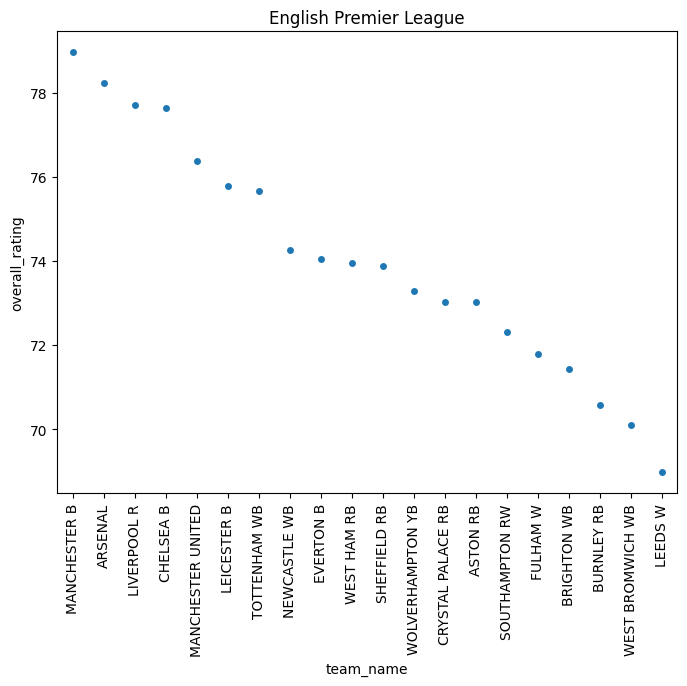

In [46]:
premierLeague = df[df['league'] == 'English League']
top_clubs_in_prem = premierLeague.groupby('team_name')['overall_rating'].mean().sort_values(ascending=False)

# Reset the index to retain the team names as tick labels on the x-axis
top_clubs_in_prem = top_clubs_in_prem.reset_index()

plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
plt.title("English Premier League")

sns.stripplot(x='team_name', y='overall_rating', data=top_clubs_in_prem, jitter=True)

plt.show()

## AGE CATEGORY

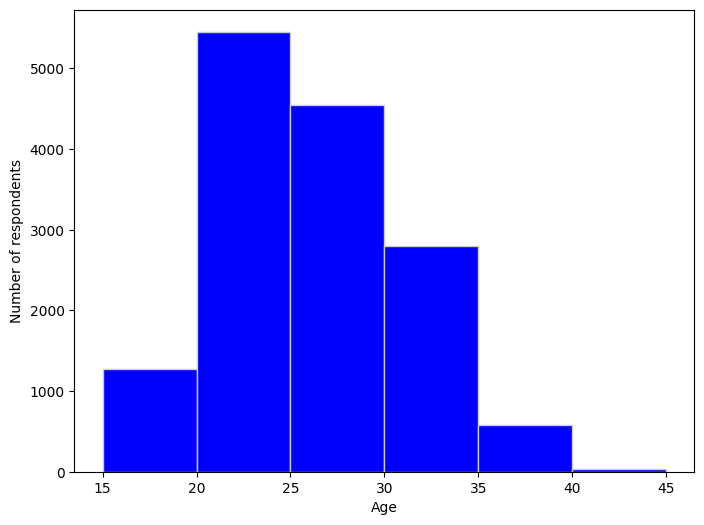

In [43]:
#histogram depicting number of players in different age groups
plt.figure(figsize=(8, 6))

plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(df.age, bins=np.arange(15,50,5), color='blue', edgecolor='.8');

#### 21-25 is our top age category followed by 26-30 and 31-35

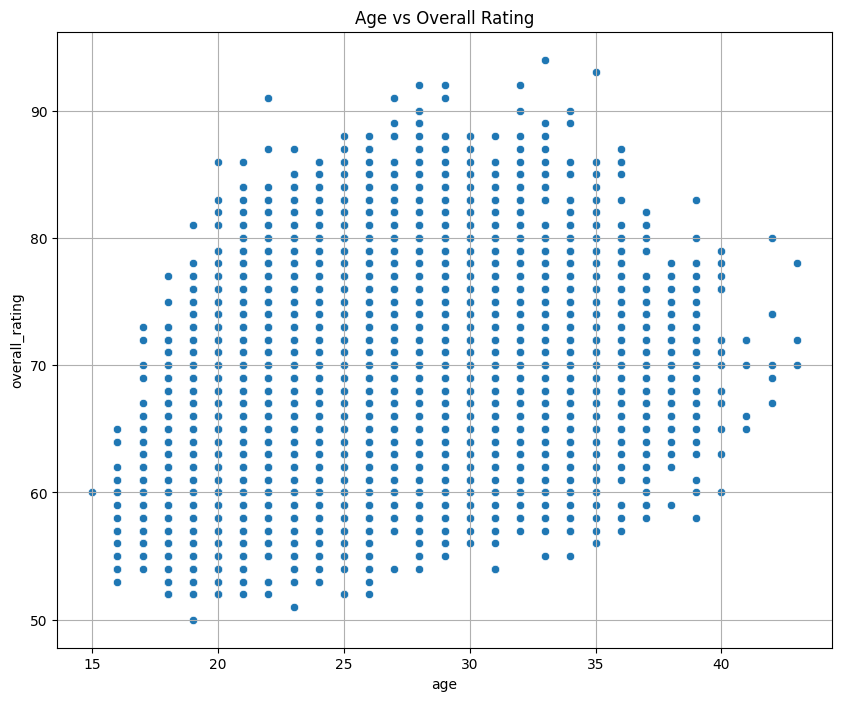

In [29]:
#Scatterplot of overall_rating vs age 
plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')

sns.scatterplot(x=df.age, y=df.overall_rating, data=df)
plt.grid(True)
plt.show()

### Observations from scatterplot:
#####     There is no player above age 40 who has rating more than 80.
#####     There is only single player from age group 15-20 who has rating above 80.
#####     The highest and the second highest rated player is from the age group 30-35  

# Questions

## Who are the top 10 players with highest overall ratings in Pes2021?

In [30]:
#Since the players are already sorted according to their overall ratings we just need to return head(10)
top_10df= df[['name', 'overall_rating']].head(10)
top_10df

,name,overall_rating
0,L. MESSI,94
1,C. RONALDO,93
2,R. LEWANDOWSKI,92
3,NEYMAR,92
4,K. DE BRUYNE,92
5,J. OBLAK,91
6,V. VAN DIJK,91
7,K. MBAPPÉ,91
8,SERGIO RAMOS,90
9,S. AGÜERO,90


## Q: Who are the top 5 players having the highest rating in each category (forwards, midfielders, defenders, goalkeepers) in Pes21 ?

### Forwards

In [53]:
top_fwd = forwards_df[['name','overall_rating']].head(3)
top_midfld = midfielders_df[['name','overall_rating']].head(3)
top_defend = defenders_df[['name','overall_rating']].head(3)
top_fwd, top_midfld, top_defend

(             name  overall_rating
 0        L. MESSI              94
 1      C. RONALDO              93
 2  R. LEWANDOWSKI              92,
             name  overall_rating
 4   K. DE BRUYNE              92
 14      CASEMIRO              89
 19      T. KROOS              88,
             name  overall_rating
 6    V. VAN DIJK              91
 8   SERGIO RAMOS              90
 26     R. VARANE              88)

### Midfielders

In [32]:
top_midfld = midfielders_df[['name','overall_rating']].head(10)
top_midfld

,name,overall_rating
4,K. DE BRUYNE,92
14,CASEMIRO,89
19,T. KROOS,88
21,BUSQUETS,88
24,THIAGO,88
31,N. KANTÉ,88
32,J. KIMMICH,88
39,SON HEUNG-MIN,87
40,MARQUINHOS,87
41,M. VERRATTI,87


### Defenders

In [33]:
top_defend = defenders_df[['name','overall_rating']].head(10)
top_defend

,name,overall_rating
6,V. VAN DIJK,91
8,SERGIO RAMOS,90
26,R. VARANE,88
33,PIQUÉ,87
38,D. ALABA,87
45,K. KOULIBALY,87
49,T. ALEXANDER-ARNOLD,87
51,G. CHIELLINI,86
55,THIAGO SILVA,86
58,S. DE VRIJ,86


### Goalkeepers

In [34]:
top_gk = goalkeepers_df[['name','overall_rating']].head(10)
top_gk

,name,overall_rating
5,J. OBLAK,91
11,ALISSON,90
12,M. NEUER,89
17,M. TER STEGEN,89
23,DAVID DE GEA,88
27,T. COURTOIS,88
29,EDERSON,88
34,S. HANDANOVIČ,87
36,W. SZCZĘSNY,87
50,H. LLORIS,86


## Which are the top 5 leagues? (Based on overall_rating)

### We will achieve this by calculating the mean of overall_rating of all players in their respective league.

In [35]:
all_leagues = df.groupby('league')['overall_rating'].mean().sort_values(ascending=False).head(5)
all_leagues

league
Spanish League                  74.319658
Serie A TIM                     74.310526
English League                  74.174528
Ligue 1 Uber Eats               72.798942
Tinkoff Russian Premier Liga    70.243590
Name: overall_rating, dtype: float64

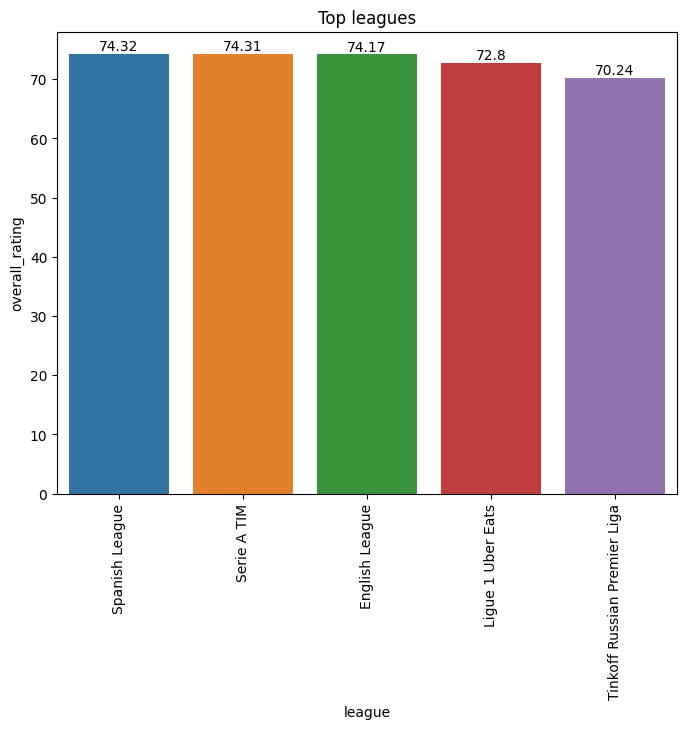

In [36]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
plt.title("Top leagues")

# Create the bar plot using Seaborn
sns.barplot(x=all_leagues.index, y=all_leagues)

# Add the values on top of the bars
for index, value in enumerate(all_leagues):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()

### We can see that Top 3 leagues are spanish league, Serie A and English league with marginal differences